# S1 Coursework - Part E

In [ ]:
import numpy as np
from tabulate import tabulate
import pandas as pd
np.random.seed(10)

# Import overall distribution which is a combination of the signal and background distributions
from Stats_Analysis import Signal_Background

## Load base class (Distribution)

In [4]:
# Parameters for Crystal Ball distribution
mean = 3
sigma = 0.3
beta = 1
m = 1.4

# Parameters for Exponential Decay distribution
lamb = 0.3

# Parameters for Normal distribution
mean_b = 0
sigma_b = 2.5

# Parameters for fraction of signal
f = 0.6

# Parameters
x_lower_trunc = 0
x_upper_trunc = 5
y_lower_trunc = 0
y_upper_trunc = 10

# Parameters in a table
print("Overall Distribution Parameters")

parameters = {
    "Part": ["Signal", "Signal", "Signal", "Signal", "Signal", "Background", "Background", "Background", "Overall", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Distribution": ["Crystal Ball", "Crystal Ball", "Crystal Ball", "Crystal Ball", "Exponential Decay", "Uniform", "Normal", "Normal", '', "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["Mean", "Sigma", "Beta", "M", "Lambda", "N/A", "Mean", "Sigma", "Fraction" ,"X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": [mean, sigma, beta, m, lamb,'N/A', mean_b, sigma_b, f,  x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc]
}
df = pd.DataFrame(parameters)
print(df.to_markdown(index=False))

# Declare the overall distribution with parameters
overall = Signal_Background(mean, sigma, beta, m, lamb, mean_b, sigma_b, f, x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc)

Overall Distribution Parameters
| Part       | Distribution      | Parameter   | Value   |
|:-----------|:------------------|:------------|:--------|
| Signal     | Crystal Ball      | Mean        | 3       |
| Signal     | Crystal Ball      | Sigma       | 0.3     |
| Signal     | Crystal Ball      | Beta        | 1       |
| Signal     | Crystal Ball      | M           | 1.4     |
| Signal     | Exponential Decay | Lambda      | 0.3     |
| Background | Uniform           | N/A         | N/A     |
| Background | Normal            | Mean        | 0       |
| Background | Normal            | Sigma       | 2.5     |
| Overall    |                   | Fraction    | 0.6     |
| Truncation | Truncation        | X Lower     | 0       |
| Truncation | Truncation        | X Upper     | 5       |
| Truncation | Truncation        | Y Lower     | 0       |
| Truncation | Truncation        | Y Upper     | 10      |
Maximum PDF value found: 0.21804724534774383


## Part E
### Bootstrap Analysis

- As seen in Part d, toys can be generating using the **accept reject method**.
- Bootstrap analysis involves generating multiple sets of **synthetic datasets (toys)** from the same distribution. 
- These toys are then **refitted** inorder to study the **variability** or **bias** in the estimated parameters and provide insight into the reliability and robustness of the fit and model.
- In this example no experimental data is provided so the samples are generated from the **true probability distribution** (true paramaters).
- In its true application, bootstrap analysis would be **applied to experimental data**. Instead of starting with the true probability distribution, the observed data would be resampled to generate bootstrap samples.

#### Generating and Storing Toys
- The `param_bootstrap_samples` method uses the `accept_reject_samples` method under the hood with poissom variability for each toy's sample size and then stores each to a file so it can be analysed in both Parts E and F
- It stores each bootstrap set seperately an output directory (Bootstrap/Samples)

    | Number of Toys  | Sample Size (Poisson Variable) |
    |---------|-------------|
    | 250     | 500         | 
    | 250     | 1000        | 
    | 250     | 2500        | 
    | 250     | 5000        | 
    | 250     | 10000       | 

    For more documentation of this method see: here


In [5]:
# Set the number of toys and sample sizes of the bootstraps
No_Toys = 250
Sample_Sizes = [500,1000,2500,5000,10000]

# Run the bootstrap generation
overall.param_bootstrap_samples(No_Toys, Sample_Sizes, output_directory="Bootstrap/Samples", poisson=True)

Generating 250 samples with base size 500...
Bootstrap samples with base size 500 saved to Bootstrap/Samples/Samples_No_250_BaseSize_500.npy
Generating 250 samples with base size 1000...
Bootstrap samples with base size 1000 saved to Bootstrap/Samples/Samples_No_250_BaseSize_1000.npy
Generating 250 samples with base size 2500...
Bootstrap samples with base size 2500 saved to Bootstrap/Samples/Samples_No_250_BaseSize_2500.npy
Generating 250 samples with base size 5000...
Bootstrap samples with base size 5000 saved to Bootstrap/Samples/Samples_No_250_BaseSize_5000.npy
Generating 250 samples with base size 10000...
Bootstrap samples with base size 10000 saved to Bootstrap/Samples/Samples_No_250_BaseSize_10000.npy


## Refitting Bootstraps
- For each bootstrap (250) of given sample size the fitting process must be rerun using `iminuits` **Extended Uninned MLE** as done in part d.
- The `param_bootstrap_fit` method uses the `fit_params` method under the hood as seen in part d
- It imports samples from an **Input Directory**: `Bootstrap/Samples`
- Exports fitted parameters and there hessian errors to an **Output Directory**: `Bootstrap/Param_Results`

#### Initial Parameters (Guess)
- As seen in part d iminuit required **initial starting positions** for each parameter fitting 
    - As the **Number of Expected Samples** changes each time this is dynamically appened for each bootstrap from the file names in Input Directory

#### Limits on paramters
- It also uses the default limits on the paramters seen previously

#### Warning of Non-Convergence
- Especially for smaller sample sizes `iminuit` may struggle to converge on an **Maximium Likelihood Estimate**
- For each bootstrap the toy that did not converge will be declared and a summary of what fraction will be returned
- Estimates that failed will be stored as `np.nan`
- This is predominently an issue for samples sizes of 500 - (Typically 5% dont converge)


For more documentation of this method see: here

In [6]:
# Initial guesses - slightly off from the true values
initial_params = [3.1, 0.4, 1.1, 1.5, 0.4, 0.1, 2.6, 0.7]

# Run the bootstrap fitting for all toys and all different sample sizes
overall.param_bootstrap_fit(initial_params , input_directory="Bootstrap/Samples", output_directory="Bootstrap/Param_Results")

Processing bootstrap samples of size 10000...
In total 0 samples did not converge out of 250.
Results saved to Bootstrap/Param_Results/ParamResults_No_250_BaseSize_10000.npy
 
Processing bootstrap samples of size 1000...


/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/Stats_Analysis/Base_Dist/NormalDistribution_Class.py:141: RuntimeWarning: invalid value encountered in divide
  return pdf / truncation_factor_fit


In total 0 samples did not converge out of 250.
Results saved to Bootstrap/Param_Results/ParamResults_No_250_BaseSize_1000.npy
 
Processing bootstrap samples of size 5000...
In total 0 samples did not converge out of 250.
Results saved to Bootstrap/Param_Results/ParamResults_No_250_BaseSize_5000.npy
 
Processing bootstrap samples of size 500...


/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11332: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11364: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/Stats_Analysis/Base_Dist/CrystalBall_Class.py:154: RuntimeWarning: invalid value encountered in divide
  return pdf / truncation_factor_fit
/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11332: RuntimeWarning: invalid value encountered in multiply
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/Users/jacobtutt/Desktop/MPhil_D

Sample 1 (size 500) did not converge
Sample 5 (size 500) did not converge
Sample 37 (size 500) did not converge
Sample 50 (size 500) did not converge
Sample 69 (size 500) did not converge
Sample 78 (size 500) did not converge
Sample 89 (size 500) did not converge
Sample 175 (size 500) did not converge


/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/Stats_Analysis/Base_Dist/NormalDistribution_Class.py:141: RuntimeWarning: divide by zero encountered in divide
  return pdf / truncation_factor_fit


Sample 185 (size 500) did not converge
Sample 212 (size 500) did not converge
Sample 234 (size 500) did not converge
Sample 244 (size 500) did not converge
In total 12 samples did not converge out of 250.
Results saved to Bootstrap/Param_Results/ParamResults_No_250_BaseSize_500.npy
 
Processing bootstrap samples of size 2500...
In total 0 samples did not converge out of 250.
Results saved to Bootstrap/Param_Results/ParamResults_No_250_BaseSize_2500.npy
 


## Analysis on Bootstrap Results
- The results from this bootstrap are visualised by the `param_bootstrap_analysis` method 
- It imports fitted parameters from an **Input Directory**: `Bootstrap/Param_Results`
- Exports plots to an **Output Directory**: `Bootstrap/Plots`

#### Plots Produced
##### Histograms
1. Each parameter across bootstrap samples.
    - value, error, and pull histograms are produced
##### Bias and Uncertainty against sample size 
2. Bias and Uncertainty trends vs. sample size for each parameter.
##### Adrian Plots
3. 'Adrian' Pull distributions for each parameter across all samples.

#### Returns Dictionary of Summary Results
For each bootstrap/ sample size: 
- Values Mean
- Values Std
- Values Bias
- Uncertainty Mean
- Uncertainty Std 
- Pull Mean
- Pull Mean Error
- Pull Std
- Pull Std Error

#### Only the Bias and Uncertainty against sample size plots are displayed in the notebook - the rest can be found in Bootstrap/Plots

For more documentation on the method see: here


Processing sample size: 1000
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 10000
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 5000
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 500
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 2500
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram

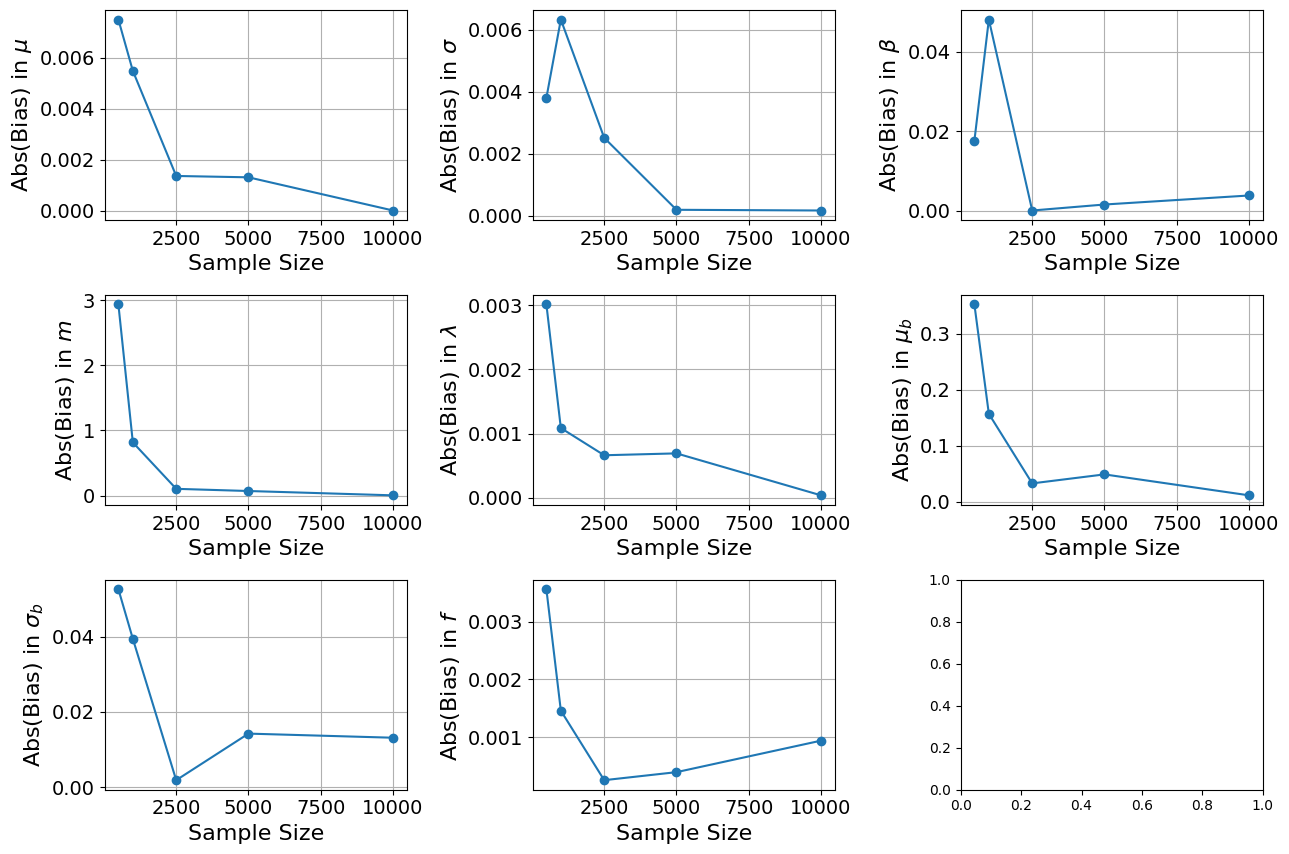

Bias vs Sample Size plot saved in Bootstrap/Plots/Trends_with_Samples_Size


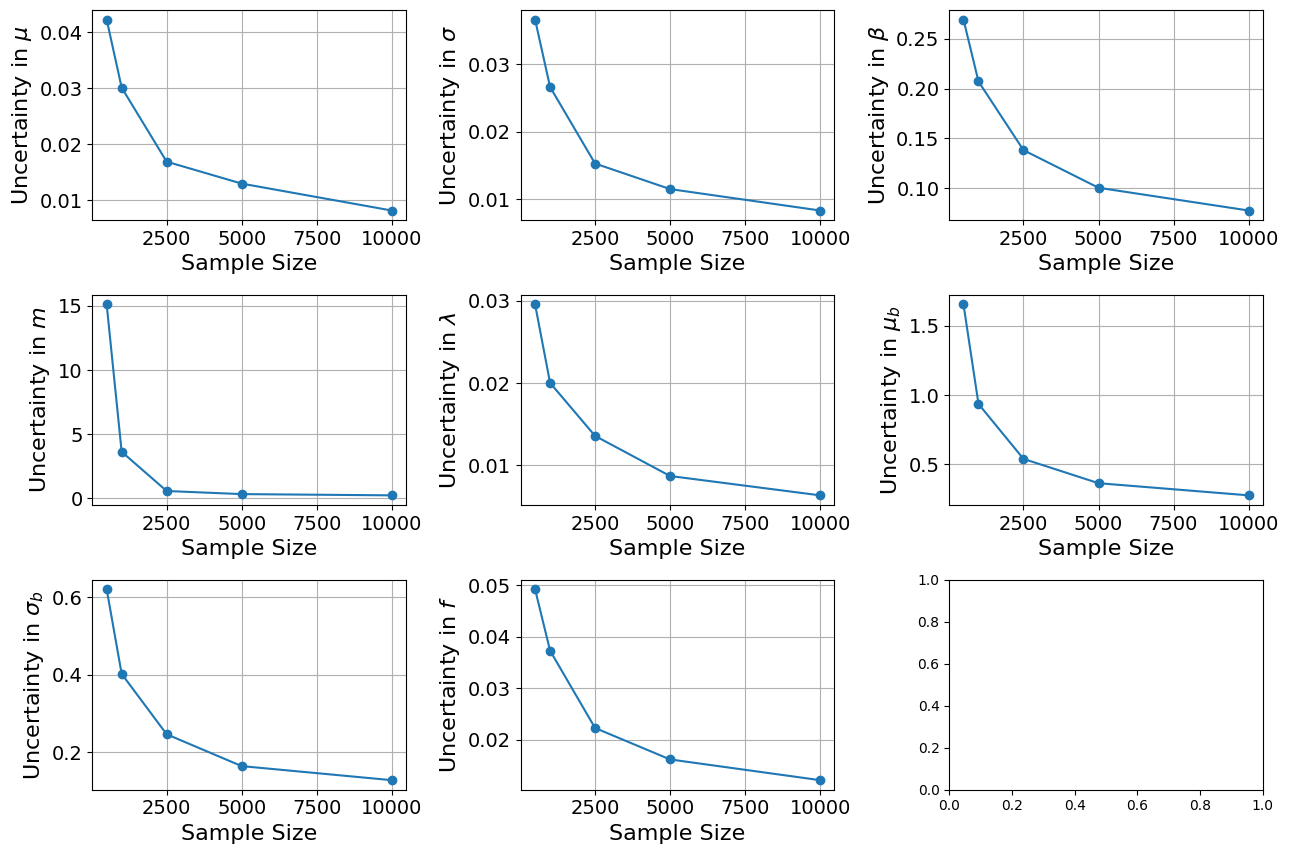

Error vs Sample Size plot saved in Bootstrap/Plots/Trends_with_Samples_Size
Saved pull distribution plot for sample size 1000 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_1000.png
Saved pull distribution plot for sample size 10000 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_10000.png
Saved pull distribution plot for sample size 5000 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_5000.png
Saved pull distribution plot for sample size 500 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_500.png
Saved pull distribution plot for sample size 2500 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_2500.png


In [ ]:
# Run analysis
bootstrap_results = overall.param_bootstrap_analysis(input_directory="Bootstrap/Param_Results", output_directory="Bootstrap/Plots")

## Table of Results from Bootstrap Analysis

In [16]:
# Print summary table - bootstrap_results
columns = ["Bootstrap Size", "Metric", "Mean", "Sigma", "Beta", "m", "Lambda", "Mean_b", "Sigma_b", "Fraction", "No. Expected"]
rows = []
for size, summary_metrics in sorted(bootstrap_results.items()): 
    
    for metric_name, values in summary_metrics.items():
        rounded_values = [round(v, 4) for v in values]
        rows.append([size, metric_name] + rounded_values)
print(tabulate(rows, headers=columns, tablefmt="grid"))

+------------------+-----------------+---------+---------+---------+----------+----------+----------+-----------+------------+----------------+
|   Bootstrap Size | Metric          |    Mean |   Sigma |    Beta |        m |   Lambda |   Mean_b |   Sigma_b |   Fraction |   No. Expected |
+==================+=================+=========+=========+=========+==========+==========+==========+===========+============+================+
|              500 | Values_Mean     |  3.0075 |  0.2962 |  0.9824 |   4.3366 |   0.303  |  -0.3524 |    2.5526 |     0.6036 |       499.537  |
+------------------+-----------------+---------+---------+---------+----------+----------+----------+-----------+------------+----------------+
|              500 | Values_Std      |  0.0422 |  0.0366 |  0.2695 |  15.1142 |   0.0295 |   1.6556 |    0.6206 |     0.0493 |        23.4662 |
+------------------+-----------------+---------+---------+---------+----------+----------+----------+-----------+------------+----------